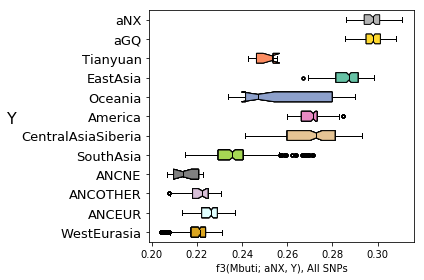

In [4]:
from plateaumodules import piid1, parseoutf3

import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import matplotlib.patches as mpatches

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]

#popname,tv,tv1,myinds=('aGQ','.tv.',"Transversions only",agq)
#popname,tv,tv1,myinds=('aGQ','.',"All SNPs",agq)
popname,tv,tv1,myinds=('aNX','.',"All SNPs",anx)
#popname,tv,tv1,myinds=('aNX','.tv.',"Transversions only",anx)

pd="/mnt/solexa/mel_yang/aPlateau/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=piid1(pd+"allpops_merged.txt")

mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)
myf3dat=parseoutf3(pd+"%s-panel-mbuti%sf3.log" % (popname,tv))

#myregions = ['aNX','aGQ','EastAsia','Oceania','SouthAsia','CentralAsiaSiberia','ANCEAS',
#             'America','ANCAMER','ANCNE','ANCOTHER','ANCEUR','WestEurasia'][::-1] ##,'Africa'
myregions = ['aNX','aGQ','Tianyuan','EastAsia','Oceania','America','CentralAsiaSiberia','SouthAsia'][::-1] ##,'Africa','ANCNE','ANCOTHER','ANCEUR','WestEurasia','ANCAMER'

out="Mbuti"
myys={}
for ind,i in enumerate(myinds):
    if i not in myys: myys[i]={}
    for popn in mysets.keys(): 
        myys[i][popn]=[]
        for smallpop in mysets[popn]: 
            if i==smallpop: continue
            if smallpop=="Mbuti": continue
            if smallpop in ["Uygur","Mixtec","Tu"]: continue
            if smallpop in ["MOS1","MOS2","MOS3","MOS4","MOS5","MOS6"]: continue
            try:
                myys[i][popn].append(myf3dat[i][(i,smallpop,out)][0])
            except KeyError:
                myys[i][popn].append(myf3dat[smallpop][(smallpop,i,out)][0])
                
fig = plt.figure() #figsize=(10,5))
ax1=fig.add_subplot(1,1,1)
myregions = ['aNX','aGQ','Tianyuan','EastAsia','Oceania','America','CentralAsiaSiberia','SouthAsia',
             'ANCNE','ANCOTHER','ANCEUR','WestEurasia'][::-1]
flierprops = dict(marker='.')
medianprops = dict(color='black')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')

biglst=[]
for region in myregions:
    mylst=[]
    for i in myys: mylst+=myys[i][region]
    biglst.append(mylst)

    box=ax1.boxplot(biglst,vert=False,notch=True,patch_artist=True, 
                    flierprops=flierprops, medianprops=medianprops)

ax1.set_yticklabels(myregions,fontsize=13)
ax1.set_xlabel("f3(Mbuti; %s, Y), %s" % (popname,tv1))
ax1.set_ylabel("Y  ",rotation=360,fontsize=16)
mycolors=[(0.70196078431372544, 0.70196078431372544, 0.70196078431372544),
          (1.0, 0.85098039215686272, 0.18431372549019609),         
          (0.9882352941176471, 0.55294117647058827, 0.3843137254901961), 
          (0.40000000000000002, 0.76078431372549016, 0.6470588235294118), 
          (0.55294117647058827, 0.62745098039215685, 0.79607843137254897), 
          (0.90588235294117647, 0.54117647058823526, 0.76470588235294112), 
          (0.89803921568627454, 0.7686274509803922, 0.58039215686274515),
         (0.65098039215686276, 0.84705882352941175, 0.32941176470588235), 
         "gray","thistle","lightcyan","goldenrod"][::-1]
for patch, color in zip(box['boxes'], mycolors):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
plt.tight_layout()
plt.show()

In [9]:
from plateaumodules import piid1, parseoutf3

import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import matplotlib.patches as mpatches

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]

#popname,tv,tv1,myinds=('aGQ','.tv.',"Transversions only",agq)
popname,tv,tv1,myinds=('aNX','.tv.',"Transversions only",anx)
#popname,tv,tv1,myinds=('aGQ','.',"All SNPs",agq)
#popname,tv,tv1,myinds=('aNX','.',"All SNPs",anx)

pd="/mnt/solexa/mel_yang/aPlateau/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=piid1(pd+"allpops_merged.txt")

mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)
myf3dat=parseoutf3(pd+"%s-panel-mbuti%sf3.log" % (popname,tv))

#myregions = ['aNX','aGQ','EastAsia','Oceania','SouthAsia','CentralAsiaSiberia','ANCEAS',
#             'America','ANCAMER','ANCNE','ANCOTHER','ANCEUR','WestEurasia'][::-1] ##,'Africa'
myregions = ['aNX','aGQ','Tianyuan','EastAsia','Oceania','America','CentralAsiaSiberia','SouthAsia'][::-1] ##,'Africa','ANCNE','ANCOTHER','ANCEUR','WestEurasia','ANCAMER'

out="Mbuti"
myys={}
for ind,i in enumerate(myinds):
    if i not in myys: myys[i]={}
    for popn in mysets.keys(): 
        myys[i][popn]=[]
        for smallpop in mysets[popn]: 
            if i==smallpop: continue
            if smallpop=="Mbuti": continue
            if smallpop in ["Uygur","Mixtec","Tu"]: continue
            if smallpop in ["MOS1","MOS2","MOS3","MOS4","MOS5","MOS6"]: continue
            try:
                myys[i][popn].append(myf3dat[i][(i,smallpop,out)][0])
            except KeyError:
                myys[i][popn].append(myf3dat[smallpop][(smallpop,i,out)][0])
                
newdict={}
myregions = ['aNX','aGQ','EastAsia','Oceania','SouthAsia','CentralAsiaSiberia','ANCEAS',
             'America','ANCNE','ANCOTHER','ANCEUR','WestEurasia']
for region in myregions:
    mylst=[]
    for i in myys: mylst+=myys[i][region]
    print region, "%.3f\t%.3f" % (np.mean(mylst), np.std(mylst))    

aNX 0.289	0.007
aGQ 0.291	0.006
EastAsia 0.275	0.008
Oceania 0.249	0.019
SouthAsia 0.228	0.012
CentralAsiaSiberia 0.260	0.012
ANCEAS nan	nan
America 0.259	0.006
ANCNE 0.210	0.005
ANCOTHER 0.216	0.006
ANCEUR 0.219	0.005
WestEurasia 0.213	0.006


/public/opt/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/public/opt/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/public/opt/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/public/opt/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/public/opt/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [2]:
from plateaumodules import piid1, parseoutf3

import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import matplotlib.patches as mpatches

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]

#popname,tv,tv1,myinds=('aGQ','.tv.',"Transversions only",agq)
popname,tv,tv1,myinds=('aNX','.tv.',"Transversions only",anx)
#popname,tv,tv1,myinds=('aGQ','.',"All SNPs",agq)
#popname,tv,tv1,myinds=('aNX','.',"All SNPs",anx)

pd="/mnt/solexa/mel_yang/aPlateau/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=piid1(pd+"allpops_merged.txt")

mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)
myf3dat=parseoutf3(pd+"%s-panel-mbuti%sf3.log" % (popname,tv))

#myregions = ['aNX','aGQ','EastAsia','Oceania','SouthAsia','CentralAsiaSiberia','ANCEAS',
#             'America','ANCAMER','ANCNE','ANCOTHER','ANCEUR','WestEurasia'][::-1] ##,'Africa'
myregions = ['aNX','aGQ','Tianyuan','EastAsia','Oceania','America','CentralAsiaSiberia','SouthAsia'][::-1] ##,'Africa','ANCNE','ANCOTHER','ANCEUR','WestEurasia','ANCAMER'

out="Mbuti"
myys={}
for ind,i in enumerate(myinds):
    if i not in myys: myys[i]={}
    for popn in mysets.keys(): 
        myys[i][popn]=[]
        for smallpop in mysets[popn]: 
            if i==smallpop: continue
            if smallpop=="Mbuti": continue
            if smallpop in ["Uygur","Mixtec","Tu"]: continue
            if smallpop in ["MOS1","MOS2","MOS3","MOS4","MOS5","MOS6"]: continue
            try:
                myys[i][popn].append(myf3dat[i][(i,smallpop,out)][0])
            except KeyError:
                myys[i][popn].append(myf3dat[smallpop][(smallpop,i,out)][0])
                
newdict={}
myregions = ['aNX','aGQ','EastAsia','Oceania','SouthAsia','CentralAsiaSiberia','ANCEAS',
             'America','ANCNE','ANCOTHER','ANCEUR','WestEurasia']
for region in myregions:
    mylst=[]
    for i in myys: mylst+=myys[i][region]
    print region, "%.3f\t%.3f" % (np.mean(mylst), np.std(mylst))    

aNX 0.289	0.007
aGQ 0.291	0.006
EastAsia 0.275	0.008
Oceania 0.249	0.019
SouthAsia 0.228	0.012
CentralAsiaSiberia 0.260	0.012
ANCEAS nan	nan
America 0.259	0.006
ANCNE 0.210	0.005
ANCOTHER 0.216	0.006
ANCEUR 0.219	0.005
WestEurasia 0.213	0.006


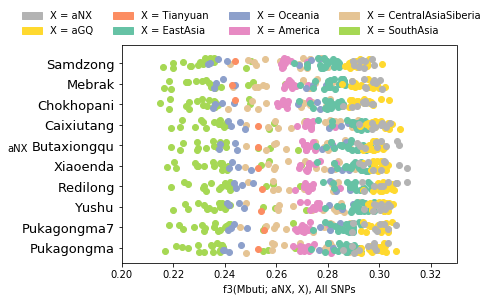

In [8]:
from plateaumodules import piid1, parseoutf3

import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import matplotlib.patches as mpatches

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]

popname,tv,tv1,myinds=('aGQ','.tv.',"Transversions only",agq)
popname,tv,tv1,myinds=('aGQ','.',"All SNPs",agq)
popname,tv,tv1,myinds=('aNX','.tv.',"Transversions only",anx)
popname,tv,tv1,myinds=('aNX','.',"All SNPs",anx)

pd="/mnt/solexa/mel_yang/aPlateau/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=piid1(pd+"allpops_merged.txt")

mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)
myf3dat=parseoutf3(pd+"%s-panel-mbuti%sf3.log" % (popname,tv))

fig = plt.figure() #figsize=(10,5))
ax1=fig.add_subplot(1,1,1)
myleglabels=sorted(mysets.keys())[::-1]
#mycolors  = [(0.40000000000000002, 0.76078431372549016, 0.6470588235294118), (0.9882352941176471, 0.55294117647058827, 0.3843137254901961), (0.55294117647058827, 0.62745098039215685, 0.79607843137254897), (0.90588235294117647, 0.54117647058823526, 0.76470588235294112), (0.65098039215686276, 0.84705882352941175, 0.32941176470588235), (1.0, 0.85098039215686272, 0.18431372549019609), (0.89803921568627454, 0.7686274509803922, 0.58039215686274515), (0.70196078431372544, 0.70196078431372544, 0.70196078431372544), (0.40000000000000002, 0.76078431372549016, 0.6470588235294118), (0.9882352941176471, 0.55294117647058827, 0.3843137254901961), (0.55294117647058827, 0.62745098039215685, 0.79607843137254897), (0.90588235294117647, 0.54117647058823526, 0.76470588235294112), (0.65098039215686276, 0.84705882352941175, 0.32941176470588235), (1.0, 0.85098039215686272, 0.18431372549019609)]
##Paired: sns.color_palette("Paired",12)

mycolors=["gray",(0.65098039215686276, 0.80784313725490198, 0.8901960784313725), (0.12156862745098039, 0.47058823529411764, 0.70588235294117652), (0.69803921568627447, 0.87450980392156863, 0.54117647058823526), (0.20000000000000001, 0.62745098039215685, 0.17254901960784313), (0.98431372549019602, 0.60392156862745094, 0.59999999999999998), (0.8901960784313725, 0.10196078431372549, 0.10980392156862745), (0.99215686274509807, 0.74901960784313726, 0.43529411764705883), (1.0, 0.49803921568627452, 0.0), (0.792156862745098, 0.69803921568627447, 0.83921568627450982), (0.41568627450980394, 0.23921568627450981, 0.60392156862745094), (1.0, 1.0, 0.59999999999999998), (0.69411764705882351, 0.34901960784313724, 0.15686274509803921)]
#mycolors=[(0.10588235294117647, 0.61960784313725492, 0.46666666666666667), (0.85098039215686272, 0.37254901960784315, 0.0078431372549019607), (0.45882352941176469, 0.4392156862745098, 0.70196078431372544), (0.90588235294117647, 0.16078431372549021, 0.54117647058823526), (0.40000000000000002, 0.65098039215686276, 0.11764705882352941), (0.90196078431372551, 0.6705882352941176, 0.0078431372549019607), (0.65098039215686276, 0.46274509803921571, 0.11372549019607843), (0.40000000000000002, 0.40000000000000002, 0.40000000000000002)]

##Based on Set2 palette, moved some colors around
mycolors=[(0.70196078431372544, 0.70196078431372544, 0.70196078431372544),
          (1.0, 0.85098039215686272, 0.18431372549019609),         
          (0.9882352941176471, 0.55294117647058827, 0.3843137254901961), 
          (0.40000000000000002, 0.76078431372549016, 0.6470588235294118), 
          (0.55294117647058827, 0.62745098039215685, 0.79607843137254897), 
          (0.90588235294117647, 0.54117647058823526, 0.76470588235294112), 
          (0.89803921568627454, 0.7686274509803922, 0.58039215686274515),
         (0.65098039215686276, 0.84705882352941175, 0.32941176470588235), ]
mycolors=mycolors[::-1]
#myregions = ['aNX','aGQ','EastAsia','Oceania','SouthAsia','CentralAsiaSiberia','ANCEAS',
#             'America','ANCAMER','ANCNE','ANCOTHER','ANCEUR','WestEurasia'][::-1] ##,'Africa'
myregions = ['aNX','aGQ','Tianyuan','EastAsia','Oceania','America','CentralAsiaSiberia','SouthAsia'][::-1] ##,'Africa','ANCNE','ANCOTHER','ANCEUR','WestEurasia','ANCAMER'

out="Mbuti"
myys={}
for ind,i in enumerate(myinds):
    if i not in myys: myys[i]={}
    for popn in mysets.keys(): 
        myys[i][popn]=[]
        for smallpop in mysets[popn]: 
            if i==smallpop: continue
            if smallpop=="Mbuti": continue
            if smallpop in ["Uygur","Mixtec","Tu"]: continue
            if smallpop in ["MOS1","MOS2","MOS3","MOS4","MOS5","MOS6"]: continue
            try:
                myys[i][popn].append(myf3dat[i][(i,smallpop,out)][0])
            except KeyError:
                myys[i][popn].append(myf3dat[smallpop][(smallpop,i,out)][0])
                
handles1=[]
for ind1,myind in enumerate(myinds):
    for ind2,myregion in enumerate(myregions):
        myxs=[ind1+1+random.uniform(-0.25,0.25) for i in myys[myind][myregion]]
        ax1.scatter(myys[myind][myregion],myxs,marker='o',facecolor=mycolors[ind2],edgecolor=mycolors[ind2])
        if ind1==0:
            handles1.append(mpatches.Patch([],[],color=mycolors[ind2],label="X = "+myregion))
ax1.set_yticks(np.array(range(1,len(myinds)+1)))
#ax1.set_ylim((0,0.4))
ax1.set_yticklabels(myinds,fontsize=13)
ax1.set_xlabel("f3(Mbuti; %s, X), %s" % (popname,tv1))
ax1.set_ylabel(popname,rotation=360)
ax1.set_xlim((0.2,0.33))
ax1.legend(handles=handles1[::-1],loc=1,bbox_to_anchor=(1.1,1.2),frameon=False,ncol=4) #
plt.show()

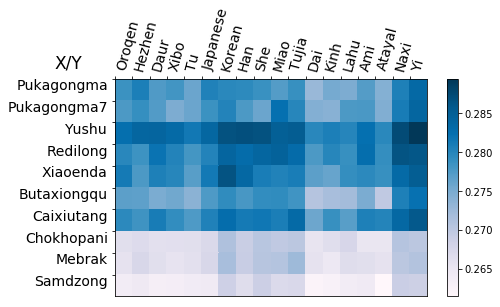

In [56]:
from plateaumodules import piid1, parseoutf3

import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.colors as colors

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
eas=["Oroqen","Hezhen","Daur","Xibo","Tu","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi"] #,"Tibetan","Sherpa"]
#popname,tv,tv1,myinds=('aGQ','.tv.',"Transversions only",agq)
popname,tv,tv1,myinds=('aNX','.tv.',"Transversions only",anx)
#popname,tv,tv1,myinds=('aGQ','.',"All SNPs",agq)
#popname,tv,tv1,myinds=('aNX','.',"All SNPs",anx)

pd="/mnt/solexa/mel_yang/aPlateau/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=piid1(pd+"allpops_merged.txt")
out="Mbuti"
mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)
myf3dat=parseoutf3(pd+"%s-panel-mbuti%sf3.log" % (popname,tv))
myary=np.zeros((len(anx),len(eas)))
for ind1,p1 in enumerate(anx):
    for ind2,p2 in enumerate(eas):
        myary[ind1,ind2]=myf3dat[p1][(p1,p2,out)][0]
        #print p1,p2,myf3dat[p1][(p1,p2,out)][0]
#myary=myary.transpose()
fig,ax = plt.subplots(figsize=(7,4))
heatmap = ax.pcolor(myary,cmap='PuBu',vmin=myary.min(),vmax=myary.max()) 
#norm=colors.LogNorm(vmin=myary.min(),vmax=myary.max()),
cbar=plt.colorbar(heatmap,ax=ax)

##LEGEND
header1=eas
header2=anx
fs=14
#ax.grid(True)
ax.set_xticks(np.arange(len(header1)), minor=False)
ax.set_yticks(np.arange(len(header2)), minor=False)

column_labels = header1
row_labels = header2
ax.set_xlim((0,len(header1)))
ax.set_ylim((0,len(header2)))
ax.set_xticklabels(column_labels, minor=False,fontsize=fs,rotation=75,ha='left')
ax.set_yticklabels(row_labels, minor=False,fontsize=fs,va='top')
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.text(-3.5,-0.5,"X/Y",fontsize=fs+3)

plt.show()

In [57]:
from plateaumodules import piid1, parseoutf3
import collections
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import matplotlib.patches as mpatches

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
eas=["Oroqen","Hezhen","Daur","Xibo","Tu","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi"] #,"Tibetan","Sherpa"]

popname,tv,tv1,myinds=('aNX','.tv.',"Transversions only",agq)
#popname,tv,tv1,myinds=('aNX','.tv.',"Transversions only",anx)
#popname,tv,tv1,myinds=('aGQ','.',"All SNPs",agq)
#popname,tv,tv1,myinds=('aNX','.',"All SNPs",anx)

pd="/mnt/solexa/mel_yang/aPlateau/outf3/"
#mypops=piid1(pd+"allpops_detailed.txt")
mypops=piid1(pd+"allpops_merged.txt")

mysets={}
for i in list(set([i[0] for i in mypops.values()])): mysets[i]=[]
for i in mypops: 
    if mypops[i][0] in mysets: mysets[mypops[i][0]].append(i)
myf3dat=parseoutf3(pd+"%s-panel-mbuti%sf3.log" % (popname,tv))

myinds=anx
myregions=eas
out="Mbuti"
myys=collections.defaultdict(list)
for ind,smallpop in enumerate(myregions):
    for i in myinds: myys[i].append(myf3dat[i][(i,smallpop,out)][0])
                
newdict={}
for region in myinds:
    print region, "%.3f\t%.3f" % (np.mean(myys[region]), np.std(myys[region]))    

Pukagongma 0.278	0.003
Pukagongma7 0.278	0.003
Yushu 0.284	0.003
Redilong 0.282	0.003
Xiaoenda 0.281	0.003
Butaxiongqu 0.276	0.003
Caixiutang 0.280	0.002
Chokhopani 0.268	0.002
Mebrak 0.268	0.002
Samdzong 0.265	0.002


210
0 ('Pukagongma', 'Ulchi')
10 ('Pukagongma', 'She')
20 ('Pukagongma', 'Sherpa')
30 ('Pukagongma7', 'Tujia')
40 ('Pukagongma7', 'Tibetan')
50 ('Yushu', 'Han')
60 ('Yushu', 'Yi')
70 ('Redilong', 'Korean')
80 ('Redilong', 'Naxi')
90 ('Xiaoenda', 'Japanese')
100 ('Xiaoenda', 'Lahu')
110 ('Butaxiongqu', 'Tu')
120 ('Butaxiongqu', 'Kinh')
130 ('Caixiutang', 'Xibo')
140 ('Caixiutang', 'Dai')
150 ('Chokhopani', 'Hezhen')
160 ('Chokhopani', 'Atayal')
170 ('Mebrak', 'Daur')
180 ('Mebrak', 'Ami')
190 ('Samdzong', 'Oroqen')
200 ('Samdzong', 'Miao')


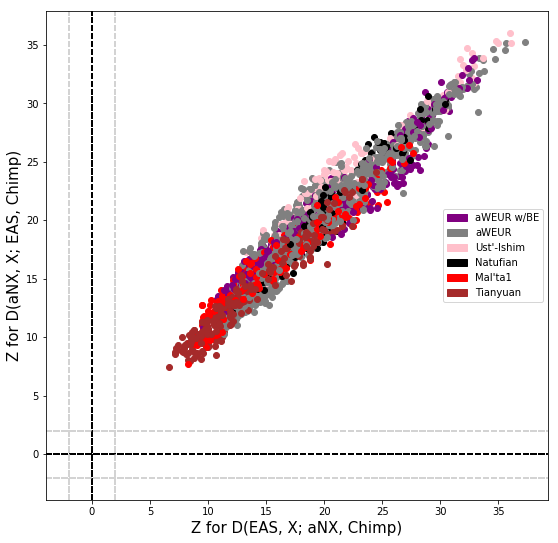

In [4]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
#import matplotlib
import matplotlib.patches as mpatches

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
#tv=""
fhall="aPlateau%s.dstat.log" % tv

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
#agq=["Zongri1a","Zongri23"]
#eur=["French","Sardinian","Finnish"]

eas=["Ulchi","Oroqen","Daur","Hezhen","Xibo","Tu","Japanese","Korean",
    "Han","Tujia","She","Miao","Ami","Atayal","Dai","Kinh","Lahu",
     "Naxi","Yi","Tibetan","Sherpa"]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
aeur=["Kostenki14","Vestonice16","GoyetQ116-1","ElMiron","Villabruna","Loschbour"]
aeur2=["Satsurblia","Kotias"]
natufian=["Natufian"]
ane=["Malta1"]
ancother=["UstIshim"]
othereas=["Tianyuan"] #,"Papuan","Onge","Oase1","Stuttgart",
varypops=[othereas, ane,natufian,ancother, aeur,aeur2][::-1]
labels=["Tianyuan","Mal'ta1",'Natufian',"Ust'-Ishim","aWEUR",'aWEUR w/BE'][::-1] #/Papuan/Onge/Oase1
dxcluster=anx
dxpairs=[(i,j) for indi,i in enumerate(dxcluster) for indj,j in enumerate(eas)] # if indi>indj]
pairlabels=["%s_%s" % mypair for mypair in dxpairs]
#print pairlabels
out="Chimp"
colors=["blue","brown","red","black","pink","gray","purple"][::-1]
markers=["o","v","s","+","D",">"]
print len(dxpairs)

fig = plt.figure(figsize=(9,9))
ax1=fig.add_subplot(1,1,1)
handles1,handles2=[],[]
for ind,mypair in enumerate(dxpairs):
    if ind % 10==0: print ind,mypair
    #ax1.set_title("D(X1, aGQ; X2, Mbuti)")
    #ax1.set_ylim((-4,10))
    #ax1.set_xlim((-4,10))
    ax1.set_ylabel("Z for D(aNX, X; EAS, %s)" % out,fontsize=15)
    ax1.set_xlabel("Z for D(EAS, X; aNX, %s)" % out,fontsize=15)
    ax1.axvline(x=0, ls='dashed', c='black')
    ax1.axhline(y=0, ls='dashed', c='black')
    ax1.axvline(x=2, ls='dashed', c='lightgray')
    ax1.axhline(y=2, ls='dashed', c='lightgray')
    ax1.axvline(x=-2, ls='dashed', c='lightgray')
    ax1.axhline(y=-2, ls='dashed', c='lightgray')
    for ivp,varypop in enumerate(varypops):
        mypops1=[mypair[0],varypop,[mypair[1]],out]
        mypops2=[mypair[1],varypop,[mypair[0]],out]
        Zary1 = pm.mkDary(pD,fhall,mypops1,(0,3),(1,2),'Z')
        Zary2 = pm.mkDary(pD,fhall,mypops2,(0,3),(1,2),'Z')
        Zary=np.transpose(np.vstack((Zary1, Zary2)))[0,:]
        ax1.plot(Zary1,Zary2,'o',color=colors[ivp]) #markers[ind],
        #if ivp==0:
        #    handles1.append(mlines.Line2D([],[],marker=markers[ind],color='black',label=pairlabels[ind]))
        if ind==0:
            handles2.append(mpatches.Patch(color=colors[ivp], label=labels[ivp]))
        else: pass
#ax1.legend(loc='lower right')
#ax1.legend(handles=handles1+handles2,loc=4,ncol=2,fontsize=12.5)
ax1.legend(handles=handles2,loc=0)
plt.show()

#fig.savefig(pD+'agqclade.D%s.relEUR.png' % tv) # save the figure to file
#plt.close(fig)

In [88]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
#import matplotlib
import matplotlib.patches as mpatches

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
#tv=""


fhall,out=("aPlateau.tv.dstat.log","Mbuti")
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
out="Chimp"
p1s=["Yushu","Xiaoenda"] #["Samdzong"]
p2s=["Daur"] #["Han","Dai","Ami","Naxi","Yi","Tibetan","Sherpa"]
p3s=["Malta1"]

print 'ALL SITES, MBUTI'
fhall,out=("aPlateau.dstat.log","Mbuti")
myfile=open(pD+fhall,'r')
for line in myfile:
    if 'result' not in line: continue
    x=line.split()
    if x[3] not in p3s or x[4] != out or x[1] not in p1s or x[2] not in p2s: continue
    print "\t".join(x[1:-3])
myfile.close()
print

print 'ALL SITES, CHIMP'
fhall,out=("aPlateau.dstat.log","Chimp")
myfile=open(pD+fhall,'r')
for line in myfile:
    if 'result' not in line: continue
    x=line.split()
    if x[3] not in p3s or x[4] != out or x[1] not in p1s or x[2] not in p2s: continue
    print "\t".join(x[1:-3])
myfile.close()
print

print 'TRANSVERSIONS, MBUTI'
fhall,out=("aPlateau.tv.dstat.log","Mbuti")
myfile=open(pD+fhall,'r')
for line in myfile:
    if 'result' not in line: continue
    x=line.split()
    if x[3] not in p3s or x[4] != out or x[1] not in p1s or x[2] not in p2s: continue
    print "\t".join(x[1:-3])
myfile.close()
print

ALL SITES, MBUTI
Yushu	Daur	Malta1	Mbuti	-0.0177	-3.156
Xiaoenda	Daur	Malta1	Mbuti	-0.0144	-2.525

ALL SITES, CHIMP
Yushu	Daur	Malta1	Chimp	-0.0157	-2.544
Xiaoenda	Daur	Malta1	Chimp	-0.0202	-3.151

TRANSVERSIONS, MBUTI
Yushu	Daur	Malta1	Mbuti	-0.0164	-1.970
Xiaoenda	Daur	Malta1	Mbuti	-0.0139	-1.430



In [91]:
import numpy as np
import plateaumodules as pm

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
tv=""
fh,out=("aPlateau%s.dstat.log"%tv,"Chimp")

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao"]
eas=["Daur","Han","Dai","Ami","Naxi","Yi","Tibetan","Sherpa"]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
#agq=["Zongri1a","Zongri23","Shangluzhuang","Heodong"]
popA=anx
popB=anx
thirdpops=eas
for myind in thirdpops:
    #myind="Shangluzhuang"
    #myind="Hejiatai"
    
    mypops1=[popA,myind,popB,out]
    mypops2=[popB,myind,popA,out]
    DorZ="Z"

    newfh1=fh.split(".")[0]+tv+DorZ+"."+"aNX_%s_aNX_%s" % (myind,out)
    #newfh2=fh.split(".")[0]+tv+DorZ+"."+"aGQ_%s_aGQ_%s" % (myind,out)
    Zary = pm.mkDary(pD,fh,mypops1,(1,3),(0,2),DorZ)    
    print pm.Zmat2xlsx(Zary,pD+"Dstats/SI_CC/"+newfh1,popA,popB,0,2)

    #Zary = pm.mkDary(pD,fh,mypops2,(1,3),(2,0),DorZ)   
    #print pm.Zmat2xlsx(Zary,pD+"Dstats/SI_AA/"+newfh2,popA,popB,2,0)

Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateauZ.aNX_Daur_aNX_Chimp!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateauZ.aNX_Han_aNX_Chimp!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateauZ.aNX_Dai_aNX_Chimp!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateauZ.aNX_Ami_aNX_Chimp!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateauZ.aNX_Naxi_aNX_Chimp!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateauZ.aNX_Yi_aNX_Chimp!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateauZ.aNX_Tibetan_aNX_Chimp!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateauZ.aNX_Sherpa_aNX_Chimp!


In [94]:
import numpy as np
import plateaumodules as pm

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
#tv=""
fh,out=("aPlateau%s.dstat.log"%tv,"Mbuti")

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao"]
eas=["Daur","Han","Dai","Ami","Naxi","Yi","Tibetan","Sherpa"]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
#agq=["Zongri1a","Zongri23","Shangluzhuang","Heodong"]
popA=agq
popB=anx
thirdpops=anx
for myind in thirdpops:
    #myind="Shangluzhuang"
    #myind="Hejiatai"
    
    mypops1=[myind,popA,popB,out]
    #mypops2=[popB,myind,popA,out]
    DorZ="Z"

    newfh1=fh.split(".")[0]+tv+DorZ+"."+"%s_aGQ_aNX_%s" % (myind,out)
    #newfh2=fh.split(".")[0]+tv+DorZ+"."+"aGQ_%s_aGQ_%s" % (myind,out)
    Zary = pm.mkDary(pD,fh,mypops1,(0,3),(1,2),DorZ)    
    print pm.Zmat2xlsx(Zary,pD+"Dstats/SI_CC/"+newfh1,popA,popB,1,2)

    #Zary = pm.mkDary(pD,fh,mypops2,(1,3),(2,0),DorZ)   
    #print pm.Zmat2xlsx(Zary,pD+"Dstats/SI_AA/"+newfh2,popA,popB,2,0)

Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateau.tvZ.Pukagongma_aGQ_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateau.tvZ.Pukagongma7_aGQ_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateau.tvZ.Yushu_aGQ_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateau.tvZ.Redilong_aGQ_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateau.tvZ.Xiaoenda_aGQ_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateau.tvZ.Butaxiongqu_aGQ_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateau.tvZ.Caixiutang_aGQ_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateau.tvZ.Chokhopani_aGQ_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateau.tvZ.Mebrak_aGQ_aNX_Mbuti!
Made /mnt/solexa/mel_yang/aPlateau/Dstats/SI_CC/aPlateau.tvZ.Samdzong_aGQ_aNX_Mbuti!


1
0 ('Dai', 'Daur')


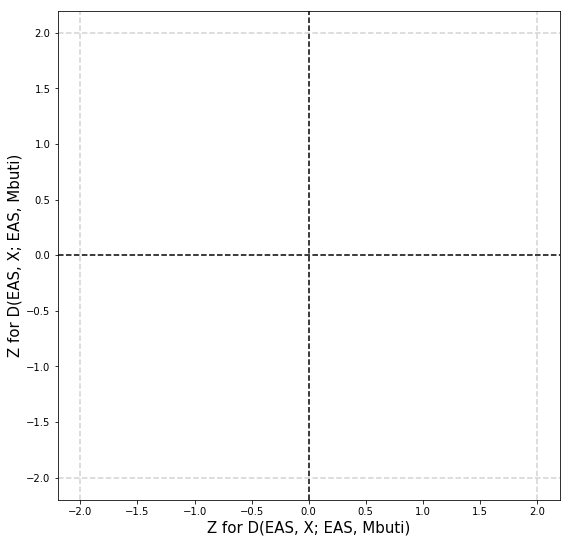

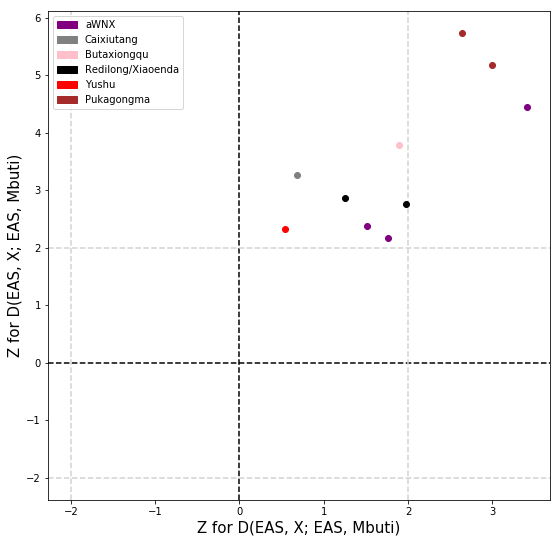

In [2]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
#import matplotlib
import matplotlib.patches as mpatches

pD="/mnt/solexa/mel_yang/aPlateau/"
tv=".tv"
tv=""
fhall="aPlateau%s.dstat.log" % tv

agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao","Shannashuzha",]
#agq=["Zongri1a","Zongri23"]
#eur=["French","Sardinian","Finnish"]

eas=["Ulchi","Oroqen","Daur","Hezhen","Xibo","Tu","Japanese","Korean",
    "Han","Tujia","She","Miao","Ami","Atayal","Dai","Kinh","Lahu",
     "Naxi","Yi","Tibetan","Sherpa"]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
puka=["Pukagongma","Pukagongma7"]
yushu=["Yushu"]
rdxed=["Redilong","Xiaoenda"]
awnx=["Chokhopani","Mebrak","Samdzong"]
buta=["Butaxiongqu"]
cxt=["Caixiutang"]

varypops=[puka,yushu,rdxed,buta,cxt,awnx][::-1]
labels=["Pukagongma","Yushu",'Redilong/Xiaoenda',"Butaxiongqu","Caixiutang",'aWNX'][::-1] #/Papuan/Onge/Oase1
dxcluster=["Daur","Dai"]
dxpairs=[(i,j) for indi,i in enumerate(dxcluster) for indj,j in enumerate(dxcluster) if indi>indj]
pairlabels=["%s_%s" % mypair for mypair in dxpairs]
#print pairlabels
out="Mbuti"
colors=["blue","brown","red","black","pink","gray","purple"][::-1]
markers=["o","v","s","+","D",">"]
print len(dxpairs)

fig = plt.figure(figsize=(9,9))
ax1=fig.add_subplot(1,1,1)
handles1,handles2=[],[]
for ind,mypair in enumerate(dxpairs):
    if ind % 10==0: print ind,mypair
    #ax1.set_title("D(X1, aGQ; X2, Mbuti)")
    #ax1.set_ylim((-4,10))
    #ax1.set_xlim((-4,10))
    ax1.set_ylabel("Z for D(EAS, X; EAS, %s)" % out,fontsize=15)
    ax1.set_xlabel("Z for D(EAS, X; EAS, %s)" % out,fontsize=15)
    ax1.axvline(x=0, ls='dashed', c='black')
    ax1.axhline(y=0, ls='dashed', c='black')
    ax1.axvline(x=2, ls='dashed', c='lightgray')
    ax1.axhline(y=2, ls='dashed', c='lightgray')
    ax1.axvline(x=-2, ls='dashed', c='lightgray')
    ax1.axhline(y=-2, ls='dashed', c='lightgray')
    for ivp,varypop in enumerate(varypops):
        mypops1=[mypair[0],varypop,[mypair[1]],out]
        mypops2=[mypair[1],varypop,[mypair[0]],out]
        Zary1 = pm.mkDary(pD,fhall,mypops1,(0,3),(1,2),'Z')
        Zary2 = pm.mkDary(pD,fhall,mypops2,(0,3),(1,2),'Z')
        Zary=np.transpose(np.vstack((Zary1, Zary2)))[0,:]
        ax1.plot(Zary1,Zary2,'o',color=colors[ivp]) #markers[ind],
        #if ivp==0:
        #    handles1.append(mlines.Line2D([],[],marker=markers[ind],color='black',label=pairlabels[ind]))
        if ind==0:
            handles2.append(mpatches.Patch(color=colors[ivp], label=labels[ivp]))
        else: pass
#ax1.legend(loc='lower right')
#ax1.legend(handles=handles1+handles2,loc=4,ncol=2,fontsize=12.5)
ax1.legend(handles=handles2,loc=0)
plt.show()

#fig.savefig(pD+'agqclade.D%s.relEUR.png' % tv) # save the figure to file
#plt.close(fig)

/mnt/solexa/mel_yang/aPlateau/images/SI_DD/D_EAS_Pukagongma_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_DD/D_EAS_Pukagongma7_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_DD/D_EAS_Yushu_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_DD/D_EAS_Redilong_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_DD/D_EAS_Xiaoenda_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_DD/D_EAS_Butaxiongqu_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_DD/D_EAS_Caixiutang_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_DD/D_EAS_Chokhopani_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_DD/D_EAS_Mebrak_EAS_Mbuti_tv_heatmap.png
/mnt/solexa/mel_yang/aPlateau/images/SI_DD/D_EAS_Samdzong_EAS_Mbuti_tv_heatmap.png


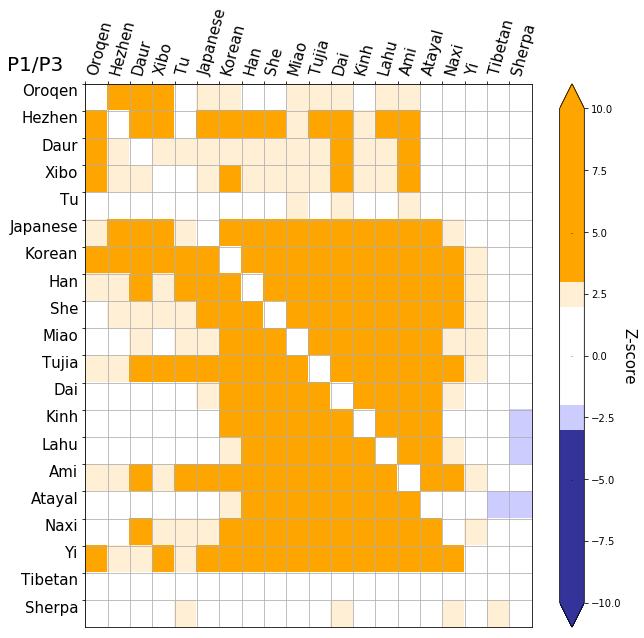

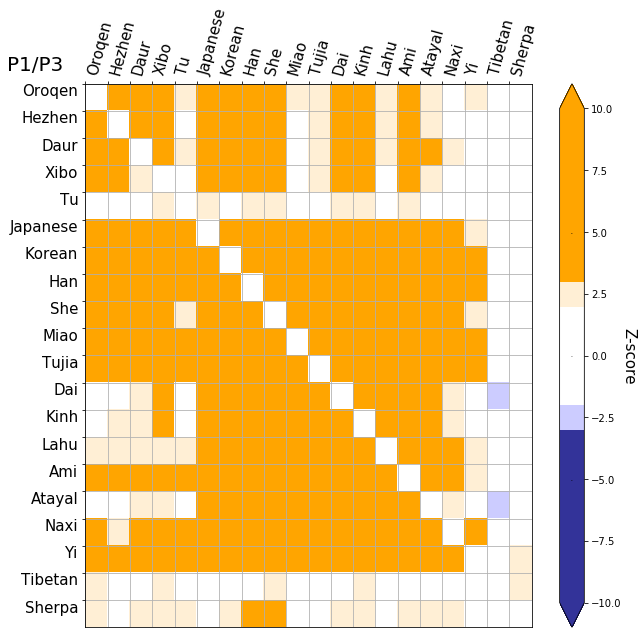

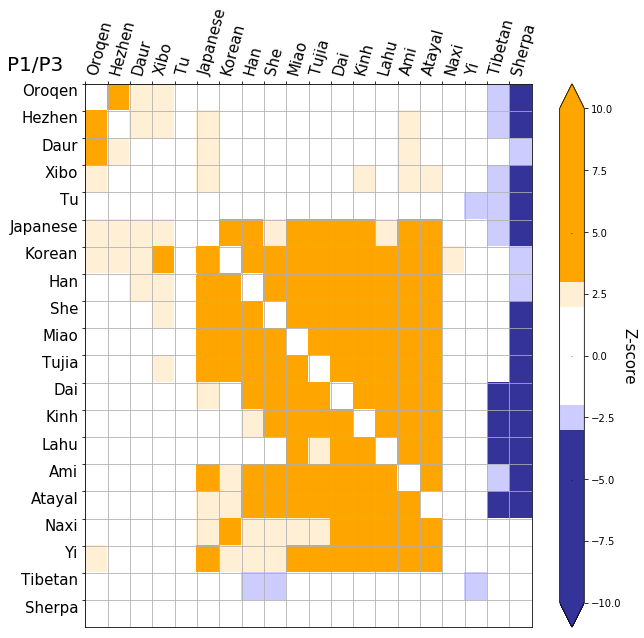

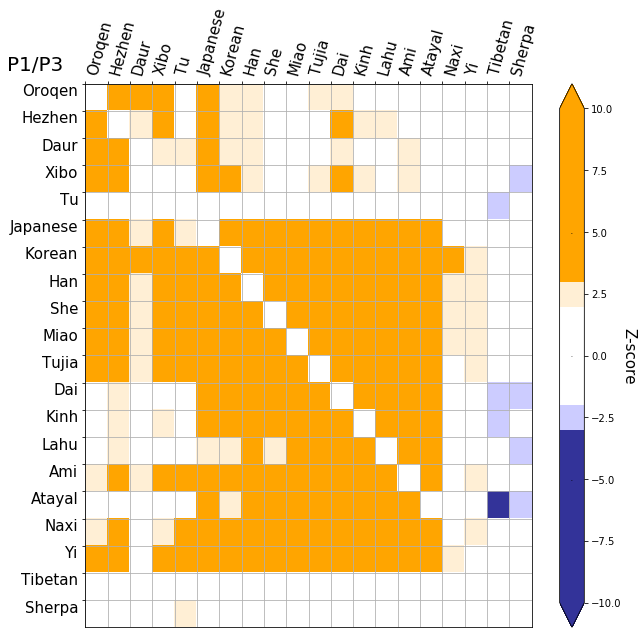

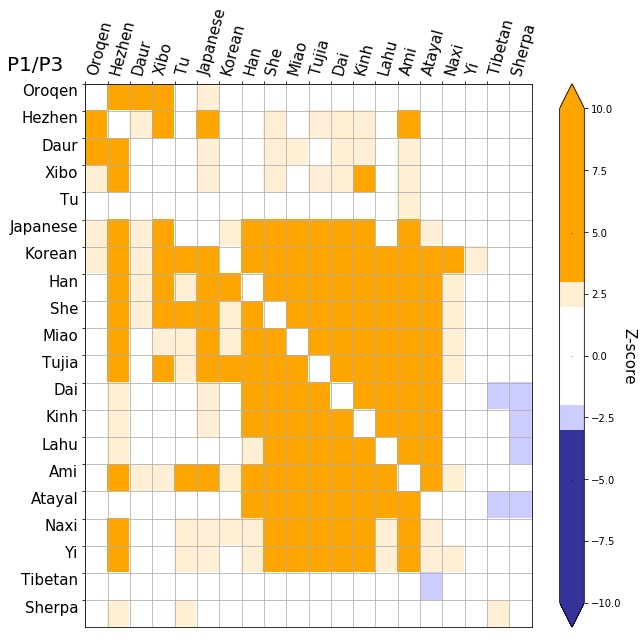

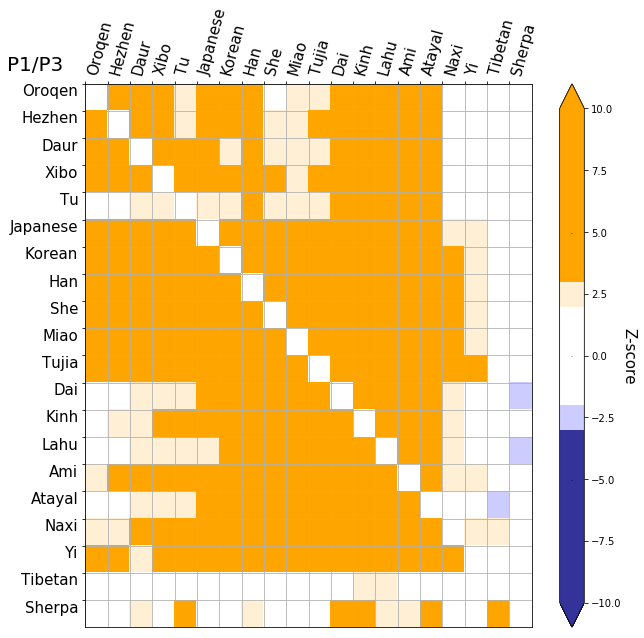

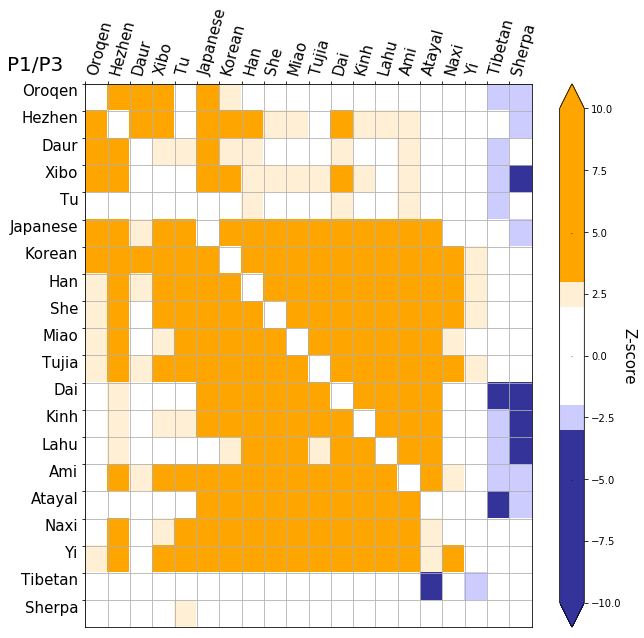

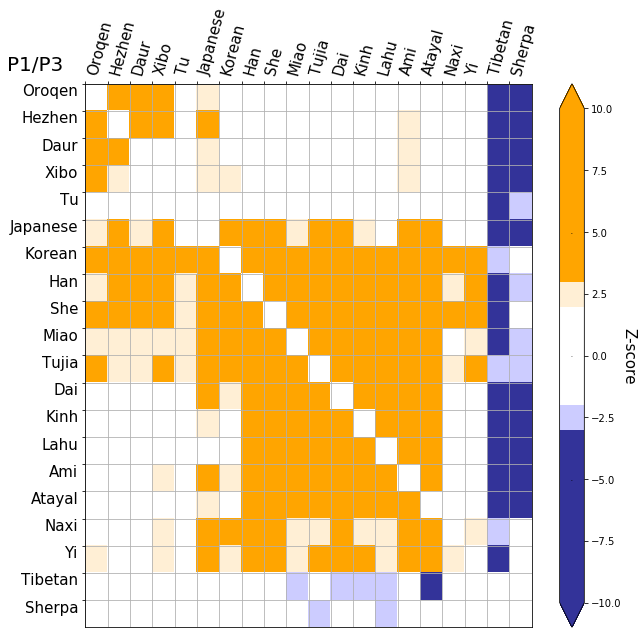

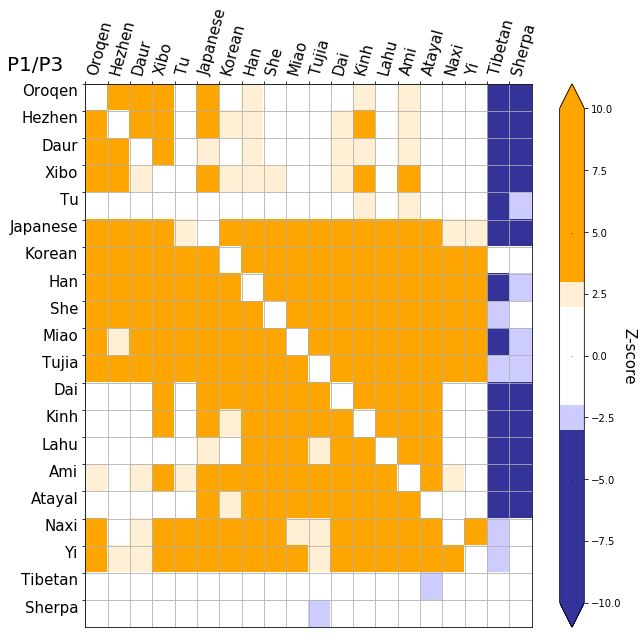

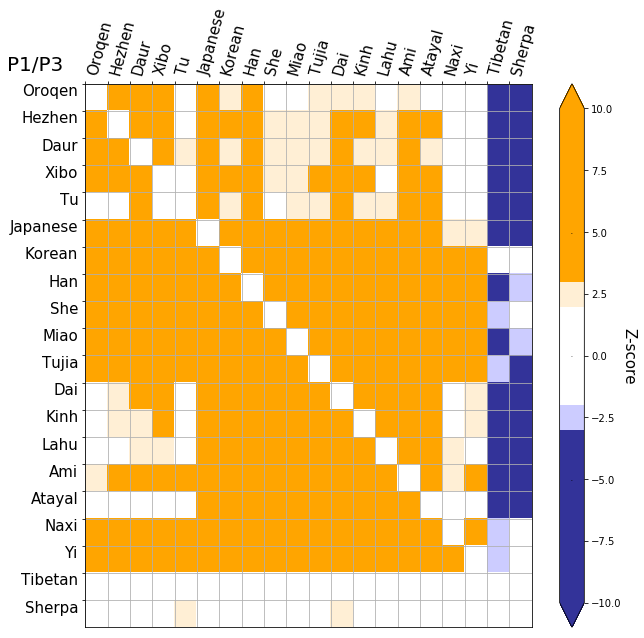

Samdzong


In [8]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
pD="/mnt/solexa/mel_yang/aPlateau/"
#fh,tv,out=("aPlateau.dstat.log",'all','Chimp')
fh,tv,out=("aPlateau.tv.dstat.log",'tv','Mbuti')
fs=15
agq=["Zongri1a","Zongri23","Shangluzhuang","Hejiatai","Heodong","Daxiang","Xiahaishi",
     "Hupo","Sanheyi","Qunke","Lajigai","Wenpuju","Jinchankou","Qijiaping",
     "Wuba","Huoshaogou","Lierbao"]
anx=["Pukagongma","Pukagongma7","Yushu","Redilong","Xiaoenda","Butaxiongqu","Caixiutang",
    "Chokhopani","Mebrak","Samdzong"]
eas=["Oroqen","Hezhen","Daur","Xibo","Tu","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tibetan","Sherpa"]
#eas=["Daur","Han","Dai","Ami","Naxi","Yi","Tibetan","Sherpa"]
wantedcolors=["blue"]*len(anx)
header1,header2=eas,eas
popA=eas
popB=eas

varypop=anx
myinds=varypop

for count,myind in enumerate(myinds):
    #myind="Shangluzhuang"
    #myind="Hejiatai"
    
    mypops1=[popA,myind,popB,out]
    mypops2=[popA,popB,myind,out]
    DorZ="Z"
    newname="D_EAS_%s_EAS_%s" % (myind,out)
    Zary = pm.mkDary(pD,fh,mypops1,(1,3),(0,2),'Z')
    Dary = pm.mkDary(pD,fh,mypops1,(1,3),(0,2),'D')
    mylabel="D(%s,%s;%s,%s)" % ('P1',myind,"P3",out)
    Zary = np.nan_to_num(Zary)
    
    levels = range(-10,11)
    multiplier=((len(levels)-6)/2)+1
    colors = ['#333399']*multiplier + ['#CCCCFF'] + ['white']*4 + ['#FFEFD5'] + ['orange']*multiplier
    cmap1,norm = matplotlib.colors.from_levels_and_colors(levels, colors,extend='both')
    
    fig,ax = plt.subplots(figsize=(10,10))
    heatmap = ax.pcolor(Zary ,cmap=cmap1, vmin=-10,vmax=10)
    cbar=plt.colorbar(heatmap)
    
    ##LEGEND
    cbar.ax.text(.5, 0.25, '$D<0$', color='black', ha='center', va='center',fontsize=fs-22)
    cbar.ax.text(.5, 0.5, '$N.S.$', color='black', ha='center', va='center',fontsize=fs-22)
    cbar.ax.text(.5, 0.75, '$D>0$', color='black', ha='center', va='center',fontsize=fs-22)
    cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel('Z-score', rotation=270,fontsize=fs)
    
    ax.grid(True)
    ax.set_xticks(np.arange(len(header2)), minor=False)
    ax.set_yticks(np.arange(len(header1)), minor=False)
    
    column_labels = header2
    row_labels = header1
    ax.set_xlim((0,len(header2)))
    ax.set_ylim((0,len(header1)))
    ax.set_xticklabels(column_labels, minor=False,fontsize=fs,rotation=75,ha='left')
    ax.set_yticklabels(row_labels, minor=False,fontsize=fs,va='top')
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.text(-3.5,-0.5,"P1/P3",fontsize=fs+5)
    newfilename='/mnt/solexa/mel_yang/aPlateau/images/SI_DD/%s_%s_heatmap.png' % (newname,tv)
    print newfilename
    fig.savefig(newfilename)
    
plt.show()
print myind

In [5]:
import pysam
